In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2
import os

from matplotlib.dates import DateFormatter

from load_wastewater_data import *
from plotting_tools import * 

# Update rcParams to set the default font to Times New Roman
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [2]:
# define experiment to be preprocessed
experiment_series = "2024_09_17"

substance = "COVID" # one of PMMoV, COVID
rain_scenario = "MittelstarkerRegen"
degradation_settings = ["no_decay", "linear_decay_0_001", "constant_decay_0_1"]  # one of "no_decay", "linear_decay_dynamics", "constant_decay_dynamics"

degradation_setting_PMMoV = "no_decay"

normalization = "PMMoV_normalization"

In [3]:
df = pd.DataFrame()
for degradation_setting in degradation_settings:
    df_metrics = pd.read_csv(os.path.join("../data", normalization, f"metrics_{degradation_setting}_PMMoV_{degradation_setting_PMMoV}_{rain_scenario}.csv"))
    df_metrics["degradation_setting"] = degradation_setting
    df_metrics = df_metrics.melt(id_vars=["time_in_days", "sampling_point", "memilio_id", "degradation_setting"], value_vars=["absolute_error", "absolute_error_unnormalized"])
    #df_metrics["rain_scenario"] = rain_scenario
    df = pd.concat([df, df_metrics], ignore_index=True)

In [4]:
df.head()

,time_in_days,sampling_point,memilio_id,degradation_setting,variable,value
0,0.002083,1,1,no_decay,absolute_error,0.0
1,0.002083,1,2,no_decay,absolute_error,0.0
2,0.002083,1,3,no_decay,absolute_error,0.0
3,0.002083,1,4,no_decay,absolute_error,0.0
4,0.002083,1,5,no_decay,absolute_error,0.0


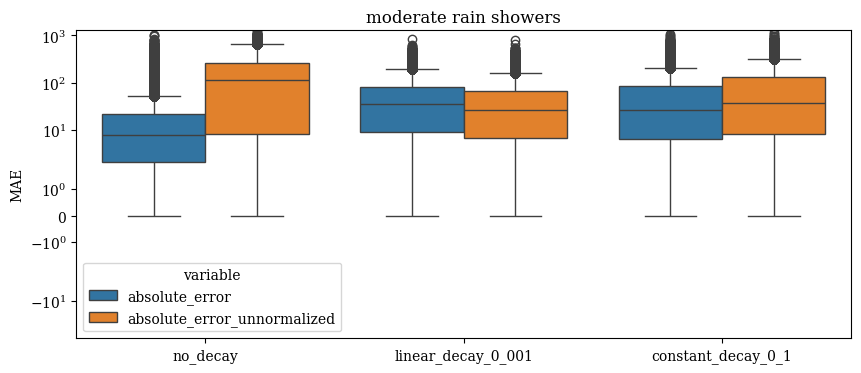

In [5]:
# Assuming df_sub is already defined
df_sub = df.loc[(df.sampling_point == 16), :]

if rain_scenario=="MittelstarkerRegen":
    c = "navy"
    t = "moderate rain showers"
else:
    c = "cornflowerblue"
    t = "moderate gentle rain showers"

# Create the boxplot
fig, ax = plt.subplots(figsize=(16.6, 4))
sns_plot = sns.boxplot(x="degradation_setting", y="value", hue="variable", hue_order = ['absolute_error_unnormalized', 'absolute_error'], data=df_sub, ax=ax)

# Set y-axis label
ax.set_ylabel("absolute error")
ax.set_xlabel("")

# Set new x-axis labels
new_labels = ['no decay', 'exponential decay dynamics', 'linear decay dynamics']
ax.set_xticklabels(new_labels)

ax.set_yscale('symlog')

labels=["unnormalized","normalized with PMMoV"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="")

ax.set(ylim=(-10, 5000))

# Display the plot
plt.title(t)
plt.show()

plot_path = f"../plots/wastewater_model/normalization_summary"
os.makedirs(os.path.join(plot_path), exist_ok=True)
fig.savefig(os.path.join(plot_path, f"norm_summary_{rain_scenario}.png"), dpi=300)